# Tutorial 4 - Gradient Descent

**Course:** SYSC 4415 - Introduction to Machine Learning

**Semester:** Fall 2021

**Adapted by:** [Kevin Dick](https://kevindick.ai/)

**Adapted From:** [Daniel Newman](https://github.com/dtnewman)'s [Notebook](https://nbviewer.jupyter.org/github/dtnewman/gradient_descent/blob/master/stochastic_gradient_descent.ipynb)

---

In this notebook we will:
1. define gradient descent (GD)
2. visualize GD applied to an arbitrary function
3. use GD to fit a linear regression model

## 1. Defining Gradient Descent

**Gradient descent**, also known as <b>steepest descent</b>, is an optimization algorithm for finding the local minimum of a function. 

**Assumption:** the function must be differentiable.

To find a local minimum, the function _"steps"_ in the  direction of the negative of the gradient. <b>Gradient ascent</b> is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums instead of minimums. 

The algorithm of gradient descent can be outlined as follows:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha_k s_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>


## 2. Visualizing Gradient Descent

As a simple example, let's find a local minimum for the function $f(x) = x^3-2x^2+2$

In [ ]:
%matplotlib inline
from sympy import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin
from IPython.display import clear_output
from time import sleep

def plot_curve(x_list, y_list):
  """ plot_curve
      Helper function to iteratively plot
      arbitrary curves.
  """
  titles = ["Gradient descent", 
            "Gradient descent (zoomed in)", 
            "Gradient descent (zoomed most)"]
  xlims = [[-1,2.5],
           [1.2,2.1],
           [1.32,1.34]]
  plt.figure(figsize=[10,3])
  for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(x_list,y_list,c="r")
    plt.plot(x_list,y_list,c="r")
    plt.plot(x,f(x), c="b")
    plt.xlim(xlims[i])
    plt.ylim([0,3])
    plt.title(titles[i])
  plt.show()

def plot_crickets(data, theta_new=None):
  """ plot_curve
      Helper function to iteratively plot
      arbitrary curves.
      ---
      theta_new, if defined, is a two-tuple of estimated parameters.
  """
  xx = np.linspace(0,21,1000)
  plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
  if not theta_new is None: plt.plot(xx,h(theta_new[0],theta_new[1],xx))
  plt.title('Striped Ground Cricket Chirp Frequency vs. Temperature')
  plt.xlabel('Frequency (chirps/sec)')
  plt.ylabel('Temperature (F)')
  plt.xlim([13,21])
  plt.ylim([65,95])
  plt.show()

def plot_generic(data, theta_new=None):
  """ plot_generic
      Helper function to iteratively plot
      arbitrary curves.
      ---
      theta_new, if defined, is a two-tuple of estimated parameters.
  """
  xx = np.linspace(0,100,1000)
  plt.scatter(data[:, 0], data[:, 1], marker='o', c='b', alpha=0.1)
  if not theta_new is None: plt.plot(xx,h(theta_new[0],theta_new[1],xx), c="r", zorder=999)
  plt.xlabel('x0')
  plt.ylabel('x1')
  plt.title(f'num. points: {len(data[:, 0])}')
  plt.show() 

In [ ]:
# Explicitly: We can create our function and derivative explicitly with lambdas
# our function
f = lambda x: x**3-2*x**2+2

# the derivative of our function
f_prime = lambda x: 3*x**2-4*x

In [ ]:
# Alternatively: We can use the SymPy library to do this for us
# We have to create a "symbol" called x
X = Symbol('x')
f = X**3-2*X**2+2
f_prime = f.diff(X)

# We can then automatically turn them into labmda functions
f = lambdify(X, f)
f_prime = lambdify(X, f_prime)

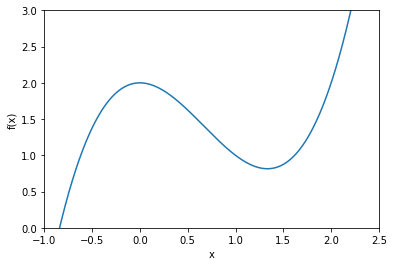

In [ ]:
# Plot the function
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

We can see from plot above that our local minimum is gonna be near around 1.4 or 1.5 (on the x-axis), but let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$

Iteration 16	x: 1.3334867076151544	diff: 0.00010228220133257082


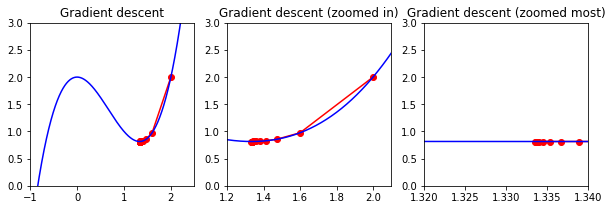

Local minimum occurs at: 1.333
Number of steps: 17


In [ ]:
# Setup some variables
x_old     = 0       # Initialized for plotting
x_new     = 2       # The algorithm starts at x = 2
n_k       = 0.1     # step size
precision = 0.0001  # threshold to stop iterations
delay     = 1       # one second of sleep to visualiize

# Lists to track values to plot
x_list, y_list = [x_new], [f(x_new)]
 
while abs(x_new - x_old) > precision:
  # Display output each iteration
  clear_output(wait=True)
  print(f'Iteration {len(x_list)}\tx: {x_new}\tdiff: {abs(x_new - x_old)}')
  plot_curve(x_list, y_list)
  sleep(delay) # To visualize

  # Apply Gradient Descent
  x_old = x_new
  s_k = -f_prime(x_old)
  x_new = x_old + n_k * s_k
  x_list.append(x_new)
  y_list.append(f(x_new))

# Print the x-value at the local minimum
print('Local minimum occurs at: {:.3f}'.format(x_new))
print("Number of steps:", len(x_list))

### Constant Step Size & [Google's Toy Example](https://developers.google.com/machine-learning/crash-course/fitter/graph)
You'll notice that the step size (also called **learning rate**) in the implementation above is **constant**. Doing this makes it easier to implement the algorithm. 

However, it also presents some issues: If the **step size is too small**, then convergence will be **very slow**, but if we make it **too large**, then the method may **fail to converge at all**. 

### Time-Based Learning Rate Decay Schedule
A solution to this is to update the step size is choosing a decrease constant $d$ that shrinks the step size over time (**Time-based**):
$\eta(t+1) = \frac{\eta(t)}{(1+t \times d)}$.

Other types of [learning rate schedules](https://en.wikipedia.org/wiki/Learning_rate#Learning_rate_schedule) can also be used, including:
* **Step-based** learning schedules changes the learning rate according to some pre-defined steps.
* **Exponential** learning schedules are similar to step-based but instead of steps a decreasing exponential function is used.

### (Advanced Reading): ["Why Momentum Really Works"](https://distill.pub/2017/momentum/)

Iteration 5	x: 1.3307784236943658	diff: 0.00032577188124571776


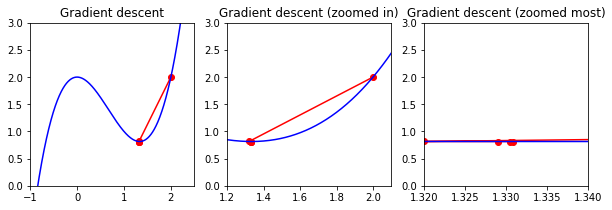

Local minimum occurs at: 1.331
Number of steps: 6


In [ ]:
# Setup the same variables
x_old     = 0       # Initialized for plotting
x_new     = 2       # The algorithm starts at x = 2
n_k       = 0.17    # step size (starting at 0.17 to show effect)
precision = 0.0001  # threshold to stop iterations
delay     = 1       # one second of sleep to visualiize
t,d       = 0,1     # NEW Time-tracking variables and Decay-value

# Lists to track values to plot
x_list, y_list = [x_new], [f(x_new)]
 
while abs(x_new - x_old) > precision:
  # Display output each iteration
  clear_output(wait=True)
  print(f'Iteration {len(x_list)}\tx: {x_new}\tdiff: {abs(x_new - x_old)}')
  plot_curve(x_list, y_list)
  sleep(delay) # To visualize
  
  
  x_old = x_new
  s_k = -f_prime(x_old)
  x_new = x_old + n_k * s_k
  x_list.append(x_new)
  y_list.append(f(x_new))

  # Time-based Step Size Decay
  n_k = n_k / (1 + t * d)
  t += 1

print('Local minimum occurs at: {:.3f}'.format(x_new))
print("Number of steps:", len(x_list))

## Using Gradient Descent to Fit a Linear Regression Model
Let's now consider an example which is a little bit more complicated. 

Consider a simple **linear regression** where we want to see how the temperature affects the noises made by crickets. 

We have a data set of cricket chirp rates at various temperatures. First we'll load that data set in and plot it:

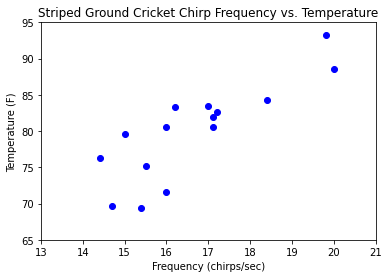

In [ ]:
# Load the dataset
data = np.loadtxt('https://github.com/dtnewman/gradient_descent/raw/master/SGD_data.txt', delimiter=',') #Using "raw" URL from github repository

#print(data)
x = data[:, 0] # Everything from the 0th column
y = data[:, 1] # Everything from the 1st column
m = len(x)     # Number of points

# Plot the data
plot_crickets(data)

Our goal is to find the equation of the straight line $h_\theta(x) = \theta_0 + \theta_1 x$ that best fits our data points. 

The function that we are trying to minimize in this case is:

$J(\theta_0,\theta_1) = {1 \over 2m} \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2$

In this case, our gradient will be defined in two dimensions. We must take the derivative with respect to each of the model parameters we wish to estimate, $\theta_0$ and $\theta_1$:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

Below, we set up our function for $h$, $J$ and the gradient:

In [ ]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x

def J(x,y,m,theta_0,theta_1):
    returnValue = 0
    for i in range(m):
        returnValue += (h(theta_0,theta_1,x[i])-y[i])**2
    returnValue = returnValue/(2*m)
    return returnValue

def grad_J(x,y,m,theta_0,theta_1):
    returnValue = np.array([0.,0.])
    for i in range(m):
        returnValue[0] += (h(theta_0,theta_1,x[i])-y[i])
        returnValue[1] += (h(theta_0,theta_1,x[i])-y[i])*x[i]
    returnValue = returnValue/(m)
    return returnValue

And we run our gradient descent algorithm (without adaptive step sizes in this example):

In [ ]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k       = 0.001 # step size
precision = 0.001
num_steps = 0
s_k       = float("inf")
delay    = 0.1

while np.linalg.norm(s_k) > precision:
  #""" Toggle to comment out this plotting block (HINT: This converges around 500K...)
  clear_output(wait=True)
  print(f'Iteration {num_steps}\tx: {x_new}\tdiff: {np.linalg.norm(s_k)}')
  plot_crickets(data, theta_new)
  sleep(delay) # To visualize"""

  # Apply Gradient Descent
  num_steps += 1
  theta_old = theta_new
  s_k = -grad_J(x,y,m,theta_old[0],theta_old[1])
  theta_new = theta_old + n_k * s_k

print("Local minimum occurs where:")
print('theta_0 = {:.3f}'.format(theta_new[0]))
print('theta_1 = {:.3f}'.format(theta_new[1]))
print("This took",num_steps,"steps to converge")

Local minimum occurs where:
theta_0 = 25.129
theta_1 = 3.297
This took 565859 steps to converge


For comparison, let's get the actual values for $\theta_0$ and $\theta_1$:

In [ ]:
actual_vals = sp.stats.linregress(x,y)
print(f"Actual values for theta (using built-in linear regression) are:\ntheta_0 = {actual_vals.intercept}\ntheta_1 = {actual_vals.slope}")

Actual values for theta (using built-in linear regression) are:
theta_0 = 25.232304983426026
theta_1 = 3.2910945679475647


So we see that our values are relatively close to the actual values (however our method was incredibly slow). 

If you look at the source code of [linregress](https://github.com/scipy/scipy/blob/master/scipy/stats/_stats_mstats_common.py), it uses the **convariance matrix of x and y** to rapidly compute the next parameter values.

#### Every Single Point is Being Used Each Round!
Notice that in the method above we need to **calculate the gradient in every step** of our algorithm. 

In the example with the crickets, this is not a big deal since there are **only 15 data points**. But imagine that we had 10 million data points! If this were the case, it would certainly make the method above far less efficient.

---

#### (Optional) Applied Homework: Implement Mini-Batch Gradient Descent
In machine learning, the algorithm above is often called <b>batch gradient descent</b> to contrast it with <b>mini-batch gradient descent</b> (which we will not go into here) and <b>stochastic gradient descent</b>.

**Mini-batch gradient descent** is a variation of the gradient descent algorithm that **splits the training dataset into small batches** that are used to calculate model error and update model coefficients.

Implementations may choose to **sum the gradient** over the mini-batch which further reduces the variance of the gradient.

Mini-batch gradient descent seeks to find **a balance between the robustness** of **stochastic gradient descent** and the **efficiency of batch gradient descent**. It is the most common implementation of gradient descent used in the field of deep learning.

---


## Stochastic Gradient Descent (SGD)
As we said above, in batch gradient descent, we must look at every example in the entire training set on every step (in cases where a training set is used for gradient descent). This can be quite slow if the training set is sufficiently large. 

In **stochastic gradient descent**, we update our values after looking at *each* item in the training set, so that we can **start making progress right away**. 

Recall the linear regression example above. In that example, we calculated the gradient for each of the two theta values as follows:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

Where $h_\theta(x) = \theta_0 + \theta_1 x$

Then we followed this algorithm (where $\alpha$ was a non-adapting stepsize):

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha s_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>

When the sample data had 15 data points as in the example above, calculating the gradient was not very costly. But for very large data sets, this would not be the case. So instead, we consider a stochastic gradient descent algorithm for simple linear regression such as the following, where m is the size of the data set:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Randomly shuffle the data set <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>for</b> i = 1 to m <b>do</b> <br>
&nbsp;&nbsp;&nbsp;     &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; // Update parameters<br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\begin{bmatrix}
 \theta_{0} \\ 
 \theta_1 \\ 
 \end{bmatrix}=\begin{bmatrix}
 \theta_0 \\ 
 \theta_1 \\ 
 \end{bmatrix}-\alpha\begin{bmatrix}
 2(h_\theta(x_i)-y_i) \\ 
 2x_i(h_\theta(x_i)-y_i) \\ 
 \end{bmatrix}$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>end for</b> <br> 
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

With **batch gradient descent**, we must go through the **entire data set before we make any progress**. With this algorithm though, we can **make progress right away** and continue to make progress as we go through the data set. 

Therefore, **stochastic gradient descent** is often preferred when dealing with **large data sets.**

Typically, with stochastic gradient descent, you will run through the entire data set 1 to 10 times (see value for $k$ in line 2 of the pseudocode above), depending on how fast the data is converging and how large the data set is.

Unlike gradient descent, stochastic gradient descent will tend to **oscillate** <i>near</i> a minimum value rather than continuously getting closer. It **may never actually converge to the minimum** though. 

One way around this is to slowly decrease (**decay**) the step size $\alpha$ as the algorithm runs. However, this is less common than using a fixed $\alpha$.

Let's look at another example where we illustrate the use of stochastic gradient descent for linear regression. In the example below, we'll create a set of 500,000 points around the line $y = 2x+17+\epsilon$, for values of x between 0 and 100:

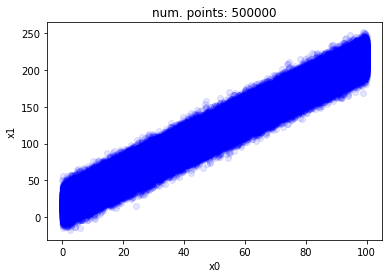

In [ ]:
f = lambda x: x*2+17+np.random.randn(len(x))*10

x = np.random.random(500000)*100
y = f(x) 
m = len(y)

plot_generic(np.column_stack((x,y)))

First, let's randomly shuffle around our dataset. Note that in this example, this step isn't strictly necessary since the data is already in a random order. However, that obviously may not always be the case:

In [ ]:
from random import shuffle

x_shuf = []
y_shuf = []
index_shuf = list(range(len(x)))
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])

Now we'll setup our h function and our cost function, which we will use to check how the value is improving.

In [ ]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x

# Function for calculating COST: The cost function is calculated as an average of loss functions
cost = lambda theta_0,theta_1, x_i, y_i: 0.5*(h(theta_0,theta_1,x_i)-y_i)**2

Now we'll run our stochastic gradient descent algorithm. 

To see it's progress, we'll take a loss measurement at every step. 

Every 10,000 steps, we'll get an average cost from the loss measured during the last 10,000 steps and then append that to our cost_list variable. We will run through the entire list 10 times here:

NOTE: Only plotting a subset of 1000 points...


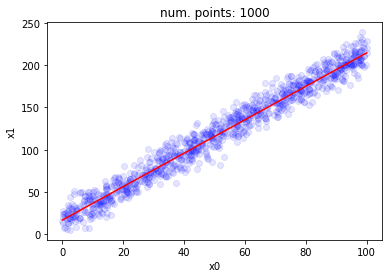

Iteration 9	Data Index: 500000
Cost: 49.434160625895075

Local minimum occurs where:
theta_0 = 16.975
theta_1 = 1.976


In [ ]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.000005 # step size

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

# Num. Plot for faster visualization
num_plot = 1000

for j in range(10):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        s_k[0] = (h(theta_old[0],theta_old[1],x[i])-y[i])
        s_k[1] = (h(theta_old[0],theta_old[1],x[i])-y[i])*x[i]
        s_k = (-1)*s_k
        theta_new = theta_old + n_k * s_k
        sum_cost += cost(theta_old[0],theta_old[1],x[i],y[i])
        if (i+1) % 10000 == 0:
            clear_output(wait=True)
            print(f'NOTE: Only plotting a subset of {num_plot} points...')
            plot_generic(np.column_stack((x[0:num_plot],y[0:num_plot])), theta_new)
            print(f'Iteration {j}\tData Index: {i+1}\nCost: {sum_cost/10000.0}')
            cost_list.append(sum_cost/10000.0)
            sum_cost = 0   
            
print("\nLocal minimum occurs where:")
print('theta_0 = {:.3f}'.format(theta_new[0]))
print('theta_1 = {:.3f}'.format(theta_new[1]))

As you can see, our values for $\theta_0$ and $\theta_1$ are close to their true values of 17 and 2.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations:

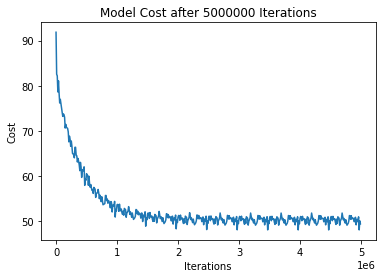

In [ ]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title(f'Model Cost after {len(cost_list)*10000} Iterations')
plt.show()

**Question:** Why do we see 10 regular "peaks" in the curve above? *(Hint: What did we fail to do at the start of each epoch?)*

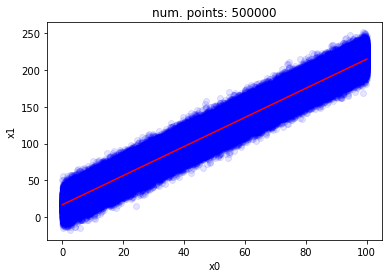

In [ ]:
# The final model plotted over all the datapoints
plot_generic(np.column_stack((x,y)), theta_new)

 
 ---

 ## Take Away Messages

* **Gradient descent**, also known as <b>steepest descent</b>, is an optimization algorithm for finding the local minimum of a function. 
* Functions must be **differentiable**.
* <b>Gradient ascent</b> is the same as gradient descent, except that it steps in the direction of the **positive of the gradient** and therefore finds **local maximums** instead of minimums. 
* **Learning rate**) can either be **constant** or **decay** according to a schedule.
* Learning Rate Issues: If the **step size is too small**, then convergence will be **very slow**, but if it is **too large**, then the method may **fail to converge at all**. 
* **Mini-batch gradient descent** is a variation of the gradient descent algorithm that **splits the training dataset into small batches** that are used to calculate model error and update model coefficients.
* Mini-batch gradient descent seeks to find **a balance between the robustness** of **stochastic gradient descent** and the **efficiency of batch gradient descent**. It is the most common implementation of gradient descent used in the field of deep learning.
* With **batch gradient descent**, we must go through the **entire data set before we make any progress**.
* In **stochastic gradient descent**, we update our values after looking at *each* item in the training set, so that we can **start making progress right away**. 
* Therefore, **stochastic gradient descent** is often preferred when dealing with **large data sets.**
* Unlike gradient descent, stochastic gradient descent will tend to **oscillate** <i>near</i> a minimum value rather than continuously getting closer. It **may never actually converge to the minimum** though. 

